Download the dataset: Dataset


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Load the dataset into the tool.

In [7]:
df=pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


3. Perform Below Visualizations.


 Univariate Analysis

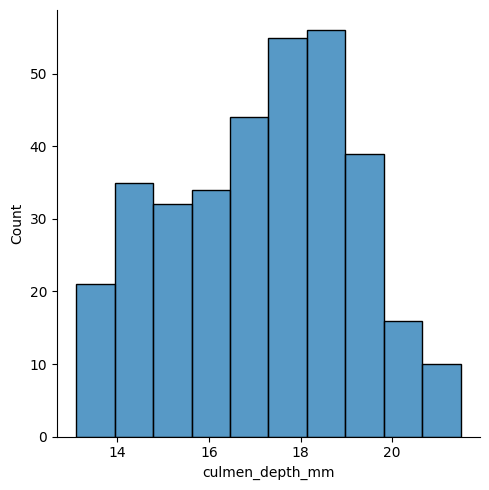

In [8]:
sns.displot(df.culmen_depth_mm)

<ipython-input-9-24e9b5890c61>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_length_mm)


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

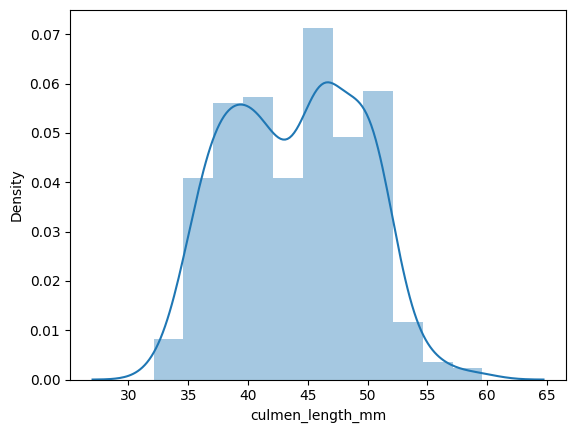

In [9]:
sns.distplot(df.culmen_length_mm)

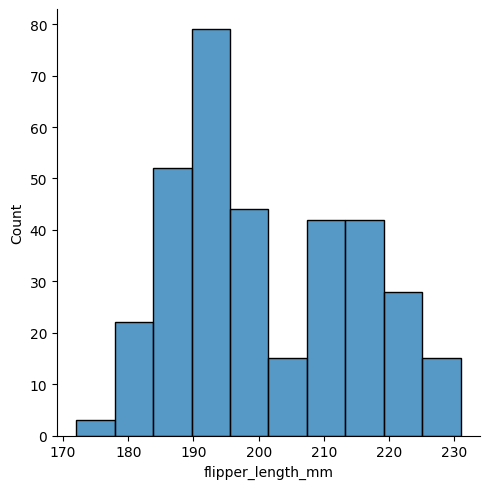

In [10]:
sns.displot(df.flipper_length_mm)

BIVARIATE ANALYSIS

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

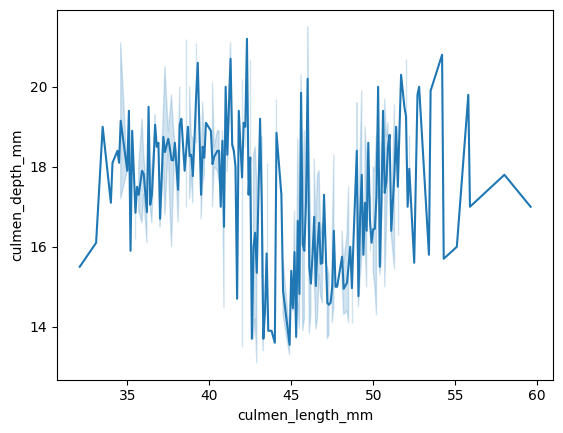

In [12]:
sns.lineplot(x=df.culmen_length_mm,y=df.culmen_depth_mm)

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

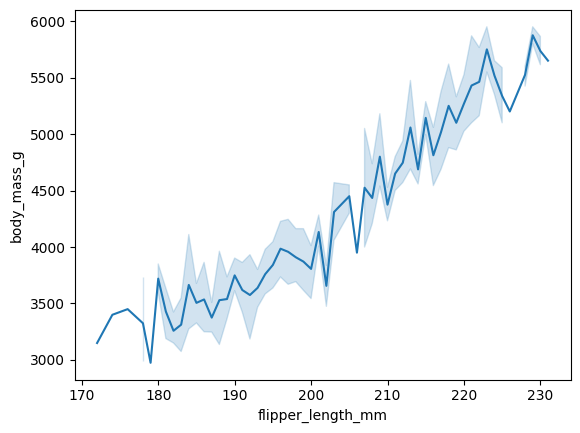

In [13]:
sns.lineplot(x=df.flipper_length_mm,y=df.body_mass_g)

Multivariate Ananlysis

<ipython-input-14-dbf7c0edd73f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="tab20")


<Axes: >

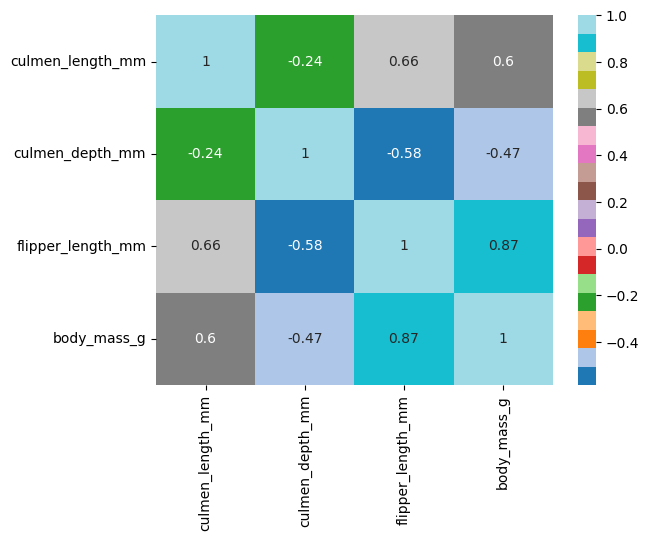

In [14]:
sns.heatmap(df.corr(),annot=True,cmap="tab20")

 Perform descriptive statistics on the dataset

In [15]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [17]:
df.shape

(344, 7)

 Check for Missing values and deal with them

In [18]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [19]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [20]:
df['sex'] = df['sex'].replace(".","MALE")
df.sex.value_counts()

MALE      169
FEMALE    165
Name: sex, dtype: int64

In [21]:
df['sex']=df['sex'].fillna("MALE")
df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [22]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [23]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

 Find the outliers and replace them outliers

<Axes: >

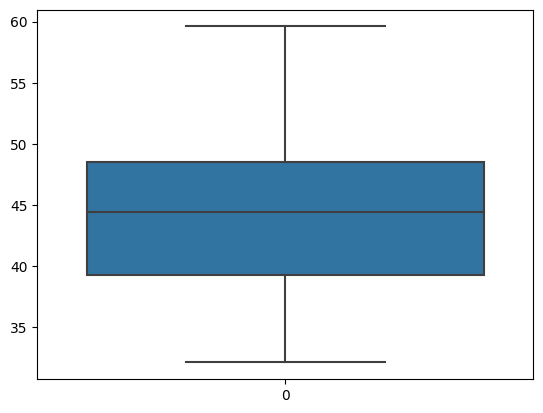

In [25]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

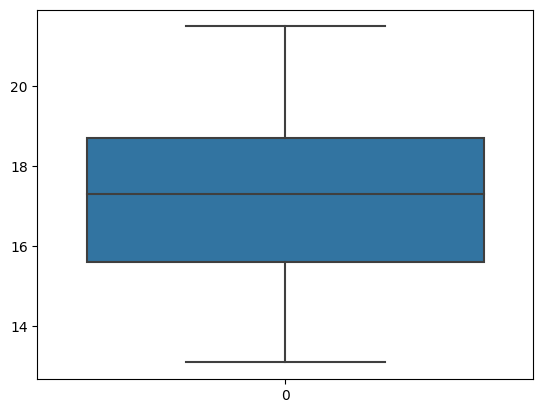

In [26]:
sns.boxplot(df.culmen_depth_mm)

<Axes: >

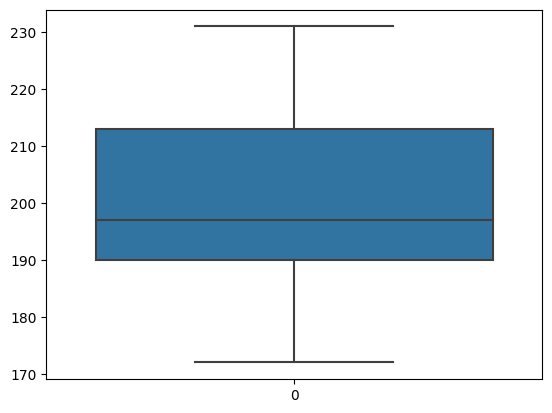

In [27]:
sns.boxplot(df.flipper_length_mm)

<Axes: >

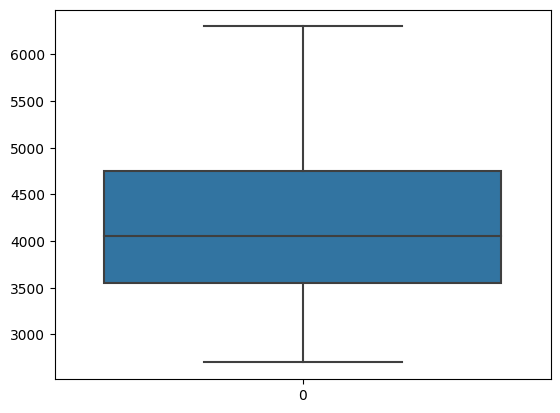

In [28]:
sns.boxplot(df.body_mass_g)

Check the correlation of independent variables with the target

In [40]:
correlation_matrix = df.corr()


<ipython-input-40-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [43]:
correlation_with_target = correlation_matrix['culmen_depth_mm'].sort_values(ascending=False)


In [44]:
print(correlation_with_target)

culmen_depth_mm      1.000000
culmen_length_mm    -0.235053
body_mass_g         -0.471916
flipper_length_mm   -0.583851
Name: culmen_depth_mm, dtype: float64


Split the data into dependent and independent variables.

In [35]:
x=df.iloc[:,1:]
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,MALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


 Check for Categorical columns and perform encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['island'] = le.fit_transform(df['island'])
x['sex'] = le.fit_transform(df['sex'])
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
3,2,NaN,NaN,NaN,NaN,1
4,2,36.7,19.3,193.0,3450.0,0


In [37]:
y = df.species
y.head()

0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: object

 Scaling the data

In [38]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,NaN,NaN,NaN,NaN,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0


 Split the data into training and testing


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

check the training and testing data shape.

In [46]:
x_train.shape

(240, 6)

In [47]:
x_test.shape

(104, 6)